In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# load data

In [3]:
import sys
sys.path.insert(0, "../research/fashion-mnist/")

In [4]:
from utils import mnist_reader
X_train, y_train = mnist_reader.load_mnist('../research/fashion-mnist/data/fashion', kind='train')
# X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [6]:
X_train.shape

(60000, 784)

# tsne

In [14]:
from openTSNE import TSNE, TSNEEmbedding, affinity, initialization
from openTSNE import initialization
from openTSNE.callbacks import ErrorLogger

## init: random

In [32]:
opt_res_rnd = []

tsne = TSNE(
    initialization="random",
    n_jobs=8,
    # The embedding will be appended to the list we defined above, make sure we copy the
    # embedding, otherwise the same object reference will be stored for every iteration
    callbacks=lambda it, err, emb: opt_res_rnd.append((it, err)),
    # This should be done on every iteration
    callbacks_every_iters=1,
)

In [33]:
%time emb_rnd = tsne.fit(X_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py", line 37:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

CPU times: user 19min 47s, sys: 38.8 s, total: 20min 26s
Wall time: 3min 25s


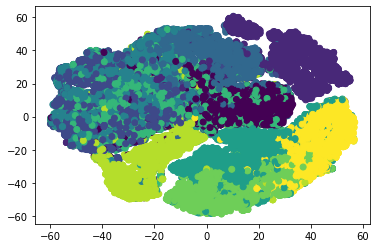

In [54]:
fig, ax = plt.subplots()
ax.scatter(emb_rnd[:,0], emb_rnd[:,1], c=y_train, rasterized=True)

In [55]:
fig.savefig('./mnist_fashion_tsne_rnd_init.pdf')

In [56]:
import k_nn_classifier

In [34]:
opt_res_rnd = np.array(opt_res_rnd)

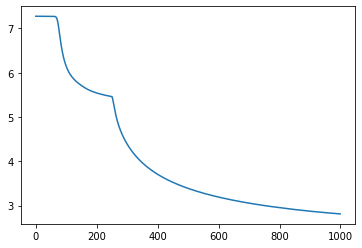

In [11]:
plt.plot(opt_res_rnd[:,1])

In [12]:
emb_rnd.affinities._PerplexityBasedNN__neighbors

array([[25719, 27655, 55310, ..., 52073, 26177,  7703],
       [42564, 37550, 31949, ..., 46787, 40465, 12117],
       [53513, 35424,  1071, ..., 49232, 24237, 38257],
       ...,
       [45348, 22272, 43297, ..., 28147, 42783, 32804],
       [17378,  8495, 57418, ..., 11947, 33368, 22506],
       [11912, 40600, 49655, ..., 23696, 59343, 29470]])

## init: PCA

In [13]:
%time init_pca = initialization.pca(X_train, random_state=42)

CPU times: user 4.64 s, sys: 308 ms, total: 4.94 s
Wall time: 1.54 s


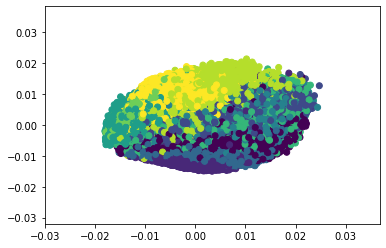

In [14]:
fig, ax = plt.subplots()
ax.scatter(init_pca[:,0], init_pca[:,1], c=y_train, rasterized=True)

In [69]:
fig.savefig('./img/pca.pdf')

In [35]:
opt_res_pca = []

tsne = TSNE(
    initialization="pca",
    n_jobs=8,
    # The embedding will be appended to the list we defined above, make sure we copy the
    # embedding, otherwise the same object reference will be stored for every iteration
    callbacks=lambda it, err, emb: opt_res_pca.append((it, err)),
    # This should be done on every iteration
    callbacks_every_iters=1,
)

In [36]:
%time embedding_pca = tsne.fit(X_train)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/pynndescent_.py", line 37:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostic

CPU times: user 20min 25s, sys: 40.5 s, total: 21min 5s
Wall time: 3min 27s


In [17]:
emb_pca = embedding_pca

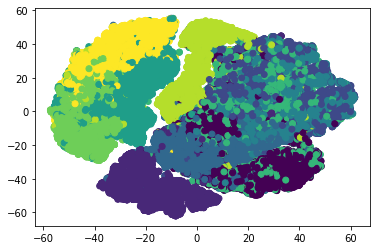

In [18]:
fig, ax = plt.subplots()
ax.scatter(emb_pca[:,0], emb_pca[:,1], c=y_train, rasterized=True)

In [37]:
opt_res_pca = np.array(opt_res_pca)

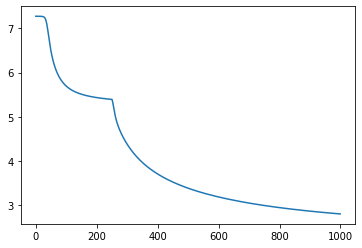

In [20]:
plt.plot(opt_res_pca[:,1])

# spectral embedding

In [38]:
from openTSNE import affinity

In [17]:
%time aff = affinity.PerplexityBasedNN(X_train, n_jobs=8)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/pynndescent-0.3.0-py3.7.egg/pynndescent/rp_trees.py", line 132:
<source missing, REPL/exec in use?>

  self.func_ir.loc))
/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/numba-0.44.0-py3.7-linux-x86_64.egg/numba/compiler.py:588: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics f

CPU times: user 3min 16s, sys: 4.22 s, total: 3min 20s
Wall time: 1min 9s


In [39]:
from sklearn.manifold import spectral_embedding

In [24]:
aff.P

<60000x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 8417134 stored elements in Compressed Sparse Row format>

In [40]:
%time res = spectral_embedding(aff.P, n_components=2, eigen_solver='amg')

CPU times: user 1min 33s, sys: 4.75 s, total: 1min 38s
Wall time: 31.6 s


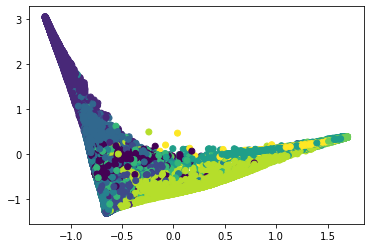

In [26]:
fig, ax = plt.subplots()
ax.scatter(res[:,0], res[:,1], c=y_train, rasterized=True)

In [63]:
fig.savefig('./img/spectral.pdf')

In [41]:
opt_res_spc = []

embedding = TSNEEmbedding(
    res,
    aff,
    n_jobs=8,
    
    callbacks=lambda it, err, emb: opt_res_spc.append((it, err)),
    callbacks_every_iters=1,
)

In [42]:
%%time

emb_1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)
emb_2 = emb_1.optimize(n_iter=750, exaggeration=1, momentum=0.8)
emb_spc = emb_2

CPU times: user 16min 26s, sys: 33.8 s, total: 17min
Wall time: 2min 14s


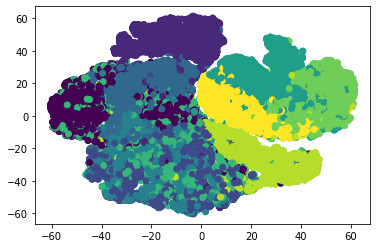

In [29]:
fig, ax = plt.subplots()
ax.scatter(emb_spc[:,0], emb_spc[:,1], c=y_train, rasterized=True)

In [43]:
opt_res_spc = np.array(opt_res_spc)

# force

### pivot

In [7]:
import forcelayout as fl
from forcelayout import distance

CPU times: user 3min 44s, sys: 5.93 s, total: 3min 50s
Wall time: 3min 44s


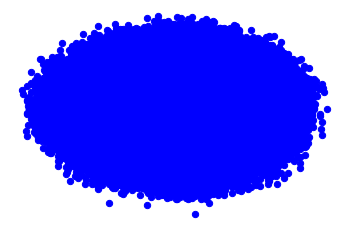

In [8]:
%time layout_pivot = fl.draw_spring_layout(X_train, algorithm=fl.Pivot, distance=distance.euclidean)

In [10]:
layout_pivot_pos = layout_pivot.get_positions()

In [11]:
from sklearn import preprocessing
layout_pivot_pos = preprocessing.scale(layout_pivot_pos)

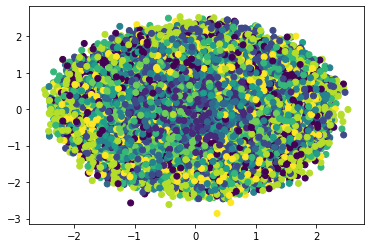

In [12]:
fig, ax = plt.subplots()
ax.scatter(layout_pivot_pos[:,0], layout_pivot_pos[:,1], c=y_train, rasterized=True)

In [44]:
opt_res_frc = []

embedding = TSNEEmbedding(
    layout_pivot_pos,
    aff,
    n_jobs=8,
    
    callbacks=lambda it, err, emb: opt_res_frc.append((it, err)),
    callbacks_every_iters=1,
)

In [45]:
%%time

emb_1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)
emb_2 = emb_1.optimize(n_iter=750, exaggeration=1, momentum=0.8)
emb_frc = emb_2

CPU times: user 16min 33s, sys: 35.1 s, total: 17min 8s
Wall time: 2min 16s


In [46]:
opt_res_frc = np.array(opt_res_frc)

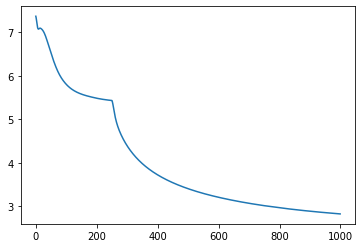

In [21]:
plt.plot(opt_res_frc[:,1])

### chalmers

CPU times: user 16min 4s, sys: 294 ms, total: 16min 4s
Wall time: 16min 4s


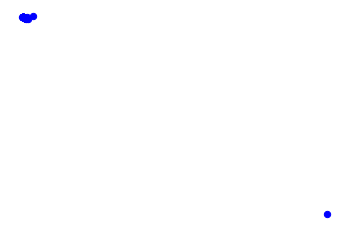

In [22]:
%time layout_neigh = fl.draw_spring_layout(X_train, algorithm=fl.NeighbourSampling, distance=distance.euclidean)

In [24]:
layout_neigh_pos = layout_neigh.get_positions()

In [25]:
layout_neigh_pos[(np.linalg.norm(layout_neigh_pos, axis=1) > 1e18)] = (0,0)
layout_neigh_pos = preprocessing.scale(layout_neigh_pos)

/home/antoine/anaconda3/envs/raviz_opentsne/lib/python3.7/site-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


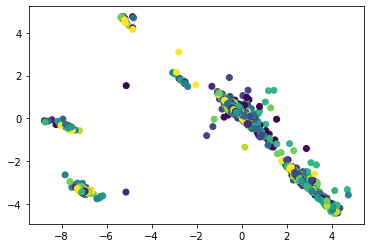

In [26]:
fig, ax = plt.subplots()
ax.scatter(layout_neigh_pos[:,0], layout_neigh_pos[:,1], c=y_train, rasterized=True)

In [47]:
opt_res_ngh = []

embedding = TSNEEmbedding(
    layout_neigh_pos,
    aff,
    n_jobs=8,
    
    callbacks=lambda it, err, emb: opt_res_ngh.append((it, err)),
    callbacks_every_iters=1,
)

In [48]:
%%time

emb_1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)
emb_2 = emb_1.optimize(n_iter=750, exaggeration=1, momentum=0.8)
emb_ngh = emb_2

CPU times: user 16min 24s, sys: 33.6 s, total: 16min 58s
Wall time: 2min 13s
Compiler : 168 ms


In [49]:
opt_res_ngh = np.array(opt_res_ngh)

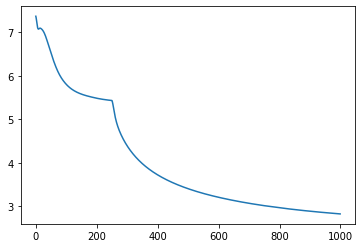

In [30]:
plt.plot(opt_res_frc[:,1])

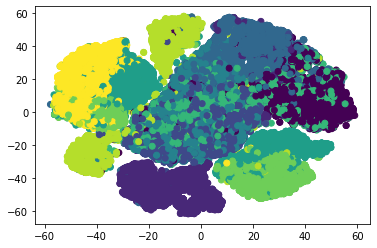

In [31]:
fig, ax = plt.subplots()
ax.scatter(emb_frc[:,0], emb_frc[:,1], c=y_train, rasterized=True)

# summary

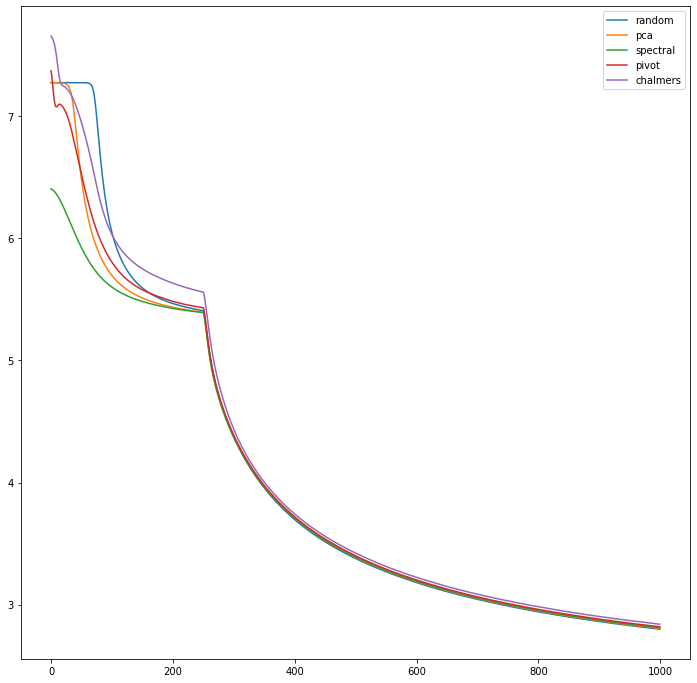

In [57]:
fig, ax = plt.subplots(figsize=(12,12))
ax.plot(opt_res_rnd[:,1])
ax.plot(opt_res_pca[:,1])
ax.plot(opt_res_spc[:,1])
ax.plot(opt_res_frc[:,1])
ax.plot(opt_res_ngh[:,1])
ax.legend(['random', 'pca', 'spectral', 'pivot', 'chalmers'])

In [71]:
id_ = -1
opt_res_rnd[id_,1], opt_res_pca[id_,1], opt_res_spc[id_,1]

(2.824954026548216, 2.8051781899430424, 2.8101608372827602)

In [58]:
fig.savefig('./comparison.pdf')

# Optimisation: spectral + no eEE

In [ ]:
emb_spc.kl_divergence

In [ ]:
plt.plot(opt_res_spc[:,1])

In [53]:
opt_res_spc_test = []

embedding = TSNEEmbedding(
    res,
    aff,
    n_jobs=8,
    
    callbacks=lambda it, err, emb: opt_res_spc_test.append((it, err)),
    callbacks_every_iters=1,
)

In [54]:
# emb_1 = embedding.optimize(n_iter=250, exaggeration=12, momentum=0.5)
emb_test = embedding.optimize(n_iter=1000, exaggeration=1, momentum=0.8)

In [55]:
opt_res_spc_test = np.array(opt_res_spc_test)

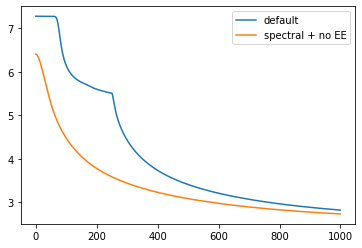

In [65]:
fig, ax = plt.subplots()
ax.plot(opt_res_rnd[:,1])
ax.plot(opt_res_spc_test[:,1])
ax.legend(['default', 'spectral + no EE'])

In [67]:
fig.savefig('./img/comp.pdf')

In [ ]:
plt.scatter(emb_test[:,0], emb_test[:,1], c=y_train, rasterized=True)

# MNIST dataset

In [ ]:
mnist = pd.read_csv('../research/mnist_784.csv')

In [ ]:
mnist.head()

In [ ]:
import logging
import daiquiri
daiquiri.setup(level=logging.INFO)
logger = daiquiri.getLogger(__name__)
logger.info("It works and log to stderr by default with color!")


In [ ]:
import tools

In [ ]:
parameters = tools.default_parameters

In [ ]:
## TSNE
tsne = TSNE(**parameters)
cb = tools.Callback(logger)
tsne.callbacks = cb 
tsne.callbacks_every_iters = 1

In [ ]:
tsne.fit(mnist)

# check Affinities distribution

In [64]:
dst = aff._PerplexityBasedNN__distances

In [76]:
dst.shape

(60000, 90)

In [78]:
dst[np.random.randint(0, 60000, size=100)]

array([[ 460.33900552,  492.30884615,  587.38317987, ..., 1057.93383536,
        1058.19657909, 1058.76342967],
       [ 475.27465744,  481.85059925,  509.24453851, ...,  762.66178611,
         763.38325892,  766.54354084],
       [ 806.3274769 ,  823.28974244,  847.69275094, ..., 1050.23568783,
        1051.67913358, 1051.96435301],
       ...,
       [ 722.80356944,  779.77496754,  987.2264178 , ..., 1439.60897469,
        1442.77129165, 1445.14186155],
       [ 951.58972252,  953.56121985,  983.22174508, ..., 1147.6035901 ,
        1149.18884436, 1149.24932021],
       [ 592.69385015,  683.7221658 ,  690.22097911, ...,  902.66882078,
         904.67894858,  905.37947845]])

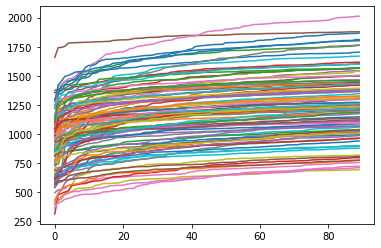

In [79]:
fig, ax = plt.subplots()

for i in dst[np.random.randint(0, 60000, size=100)]:
    ax.plot(i)

In [80]:
fig.savefig('mnist_fashion_100_distances.pdf')